In [1]:
from google.colab import drive
drive.mount('/MultiClusterGAN')
%cd /MultiClusterGAN/MyDrive/CNS/
%pip install -q scanpy

Drive already mounted at /MultiClusterGAN; to attempt to forcibly remount, call drive.mount("/MultiClusterGAN", force_remount=True).
/MultiClusterGAN/MyDrive/CNS


In [2]:
import scanpy as sc
adata=sc.read_h5ad('data/20220414_adata_final_rank5_update.h5ad')

adata_density = sc.read_h5ad('/MultiClusterGAN/MyDrive/a_ClusterMap2_0223/DAPI_image_extraction/input_data/starmap/20220411_adata_finaldensity.h5ad')

adata.obs['cell_density'] = adata_density.obs['cell_density']

In [9]:
tissue_revise = sc.read_h5ad('data/20220414_tissue_region_revised.h5ad')

In [24]:
adata.obs['Tissue_final_label_0313'] = adata.obs['Tissue_final_label']

adata.obs = adata.obs.drop(['Tissue_final_label'], axis=1)

In [54]:
adata.obs['Tissue_symbol_0313'] = adata.obs['Tissue_symbol']
adata.obs = adata.obs.drop(['Tissue_symbol'], axis=1)

In [72]:
adata.obs['Tissue_description_0313'] = adata.obs['Tissue_description']
adata.obs = adata.obs.drop(['Tissue_description'], axis=1)

In [37]:
adata.obs['Tissue_final_label_0414'] = list(tissue_revise.obs['revised_tissue_0414'])

In [89]:
adata.obs['Tissue_symbol_0414'] = adata.obs['Tissue_symbol_0313']
adata.obs['Tissue_symbol_0414'] = adata.obs['Tissue_symbol_0414'].astype('str')

merge_0 = adata[adata.obs['Tissue_final_label_0313'] == 'Merge_0',:].obs['Tissue_final_label_0414'].value_counts()

merge_0_symbol=['Mixed_C_0', 'SCm_PRT_MRN','PAGm_HYdp ','ZI_MPO_MPN','PSV',
                'Mixed_C_Fiber_A','CS_PRNr','III_VII_MV','NTS_SP','VTA_SNc',
                'IO_LIN','Mixed_C_Fiber_B']

for idx,tissue_name in enumerate(merge_0.keys()):
    # adata[adata.obs['Tissue_final_label_0414'] == tissue_name,:]
    adata.obs.loc[adata.obs['Tissue_final_label_0414'] == tissue_name,'Tissue_symbol_0414'] = merge_0_symbol[idx]

In [91]:
merge_2 = adata[adata.obs['Tissue_final_label_0313'] == 'Merge_2',:].obs['Tissue_final_label_0414'].value_counts()
merge_2_symbol=['DR_PCG_DTN_LDT','PB']
for idx,tissue_name in enumerate(merge_2.keys()):
    adata.obs.loc[adata.obs['Tissue_final_label_0414'] == tissue_name, 'Tissue_symbol_0414'] = merge_2_symbol[idx]

In [92]:
adata.obs['Tissue_description_0414'] = adata.obs['Tissue_description_0313']
adata.obs['Tissue_description_0414'] = adata.obs['Tissue_description_0414'].astype('str')

merge_0 = adata[adata.obs['Tissue_final_label_0313'] == 'Merge_0',:].obs['Tissue_final_label_0414'].value_counts()


In [93]:
merge_0_symbol=['Pallidum, Lateral-anterior hypothalamus, Pons, Medulla (medial), Substantia nigra reticular part (SNr) and  Red nucleus (RN) in the midbrain (MB)',
                'Superior colliculus, motor related (SCm), Pretectal region (PRT), Midbrain reticular nucleus (MRN)',
                'Periaqueductal gray (PAG, medial), Pontine central gray (PCG, ventral), dorsal-posterior hypothalamus (HYdp); related to cluster Peri-V and DR_PCG ',
                'Zona incerta (ZI), Medial preoptic area (MPO), Medial preoptic nucleus (MPN) ',
                'Principal sensory nucleus of the trigeminal (PSV)',
                'Fiber tracts, related to Fiber_tracts_C and Fiber_tracts_D',
                'Superior central nucleus raphe (CS), Pontine reticular nucleus (PRNr)',
                'Oculomotor nucleus (III), Facial motor nucleus (VII), Medial vestibular nucleus (MV)',
                'Nucleus of the solitary tract (NTS), Spinal cord gray matter boundary, related to cluster SP',
                'Ventral tegmental area (VTA), Substantia nigra, compact part (SNc)',
                'Inferior olivary complex (IO), Linear nucleus of the medulla (LIN)',
                'Fiber tract  fornix system (fx), related to Fiber_tracts_A']

for idx,tissue_name in enumerate(merge_0.keys()):
    # adata[adata.obs['Tissue_final_label_0414'] == tissue_name,:]
    adata.obs.loc[adata.obs['Tissue_final_label_0414'] == tissue_name, 'Tissue_description_0414'] = merge_0_symbol[idx]
    # break                

In [94]:
merge_2 = adata[adata.obs['Tissue_final_label_0313'] == 'Merge_2',:].obs['Tissue_final_label_0414'].value_counts()
merge_2_symbol=['Dorsal nucleus raphe (DR), Pontine central gray (PCG), Dorsal tegmental nucleus (DTN), Laterodorsal tegmental nucleus (LDT) ',
                'Parabrachial nucleus (PB)']
for idx,tissue_name in enumerate(merge_2.keys()):
    adata.obs.loc[adata.obs['Tissue_final_label_0414'] == tissue_name, 'Tissue_description_0414'] = merge_2_symbol[idx]

In [100]:
adata.obs

,orginindex,col,row,z,sample,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,n_genes,...,Tissue_anatomical_parent_label,Tissue_color,Rank5_Symbol_0414,cell_density,Tissue_final_label_0313,Tissue_final_label_0414,Tissue_symbol_0313,Tissue_symbol_0414,Tissue_description_0313,Tissue_description_0414
977515,11.0,32050.916667,376.777778,1.888889,sagittal3,25,3.258097,36.0,3.610918,25.0,...,root,a98ebe,INH_9,54.803495,45+Merge_7,45+Merge_7,SP,SP,"Spinal cord gray matter, dorsal posterior medulla","Spinal cord gray matter, dorsal posterior medulla"
977516,13.0,31180.109375,730.031250,4.734375,sagittal3,49,3.912023,64.0,4.174387,49.0,...,root,a98ebe,INH_9,33.458482,45+Merge_7,45+Merge_7,SP,SP,"Spinal cord gray matter, dorsal posterior medulla","Spinal cord gray matter, dorsal posterior medulla"
977517,14.0,31231.711111,995.088889,4.088889,sagittal3,29,3.401197,45.0,3.828641,29.0,...,root,a98ebe,PVM,39.006833,45+Merge_7,45+Merge_7,SP,SP,"Spinal cord gray matter, dorsal posterior medulla","Spinal cord gray matter, dorsal posterior medulla"
977518,15.0,31235.095238,808.761905,4.404762,sagittal3,33,3.526361,42.0,3.761200,33.0,...,root,a98ebe,SER_2,38.628058,45+Merge_7,45+Merge_7,SP,SP,"Spinal cord gray matter, dorsal posterior medulla","Spinal cord gray matter, dorsal posterior medulla"
977519,16.0,31441.180723,854.253012,4.831325,sagittal3,54,4.007333,83.0,4.430817,54.0,...,root,a98ebe,INH_10,54.571254,45+Merge_7,45+Merge_7,SP,SP,"Spinal cord gray matter, dorsal posterior medulla","Spinal cord gray matter, dorsal posterior medulla"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251394,51135.0,12529.654135,30102.127820,5.842105,well3_5,58,4.077537,133.0,4.897840,58.0,...,Cerebral nuclei,d89da6,AC_6,17.444448,34,34,Fiber_tracts_C,Fiber_tracts_C,Surface enriched,Surface enriched
251395,51136.0,12392.578512,30191.504132,6.123967,well3_5,53,3.988984,121.0,4.804021,53.0,...,Striatum ventral region,FFB6C1,AC_6,13.202645,Layer1+hippo-merge_0_0_3_7,Layer1+hippo-merge_0_0_3_7,Mixed_A,Mixed_A,"Cortical L1; Ammon's horn, non-pyramidal layer...","Cortical L1; Ammon's horn, non-pyramidal layer..."
251396,51137.0,12836.442308,29772.788462,15.788462,well3_5,33,3.526361,52.0,3.970292,33.0,...,lateral olfactory tract general,d89da6,VLM_1,31.069694,34,34,Fiber_tracts_C,Fiber_tracts_C,Surface enriched,Surface enriched
251397,51138.0,13028.637931,29868.379310,14.103448,well3_5,39,3.688879,58.0,4.077538,39.0,...,lateral olfactory tract general,d89da6,VLM_1,25.447252,34,34,Fiber_tracts_C,Fiber_tracts_C,Surface enriched,Surface enriched


In [103]:
adata.write_h5ad('data/20220418_adata_final.h5ad')

In [ ]:
adata.obs

In [106]:
list(adata.obs['Rank4_Defined'].unique())

[nan,
 'Perivascular macrophages',
 'Cholinergic and monoaminergic neurons',
 'Oligodendrocytes',
 'Ependymal cells',
 'Di- and mesencephalon inhibitory neurons',
 'Oligodendrocyte precursor cells',
 'Astrocytes',
 'Microglia',
 'Telencephalon projecting excitatory neurons',
 'Vascular and leptomeningeal cells',
 'Di- and mesencephalon excitatory neurons',
 'Peptidergic neurons',
 'Telencephalon projecting inhibitory neurons',
 'Glutamatergic neuroblasts',
 'Choroid epithelial cells',
 'Vascular smooth muscle cells',
 'Hindbrain neurons',
 'Cerebellum neurons',
 'Telencephalon inhibitory interneurons',
 'Olfactory ensheathing cells',
 'Olfactory inhibitory neurons',
 'Dentate gyrus granule neurons']

In [35]:
!pip install -q adjustText

In [38]:
import math,adjustText
from sklearn.neighbors import NearestNeighbors
from matplotlib.collections import LineCollection

### curve
def hanging_line(point1, point2):
    a = (point2[1] - point1[1])/(np.cosh(point2[0]) - np.cosh(point1[0]))
    b = point1[1] - a*np.cosh(point1[0])
    x = np.linspace(point1[0], point2[0], 100)
    y = a*np.cosh(x) + b
    return (x,y)

In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd 


In [12]:
Plot_Rank4 = 'Telencephalon projecting excitatory neurons'

In [109]:
adata_sub = adata[adata.obs['Rank4_Defined'] == Plot_Rank4,:].copy()

In [126]:
intersect_gene = np.intersect1d(adata_sub.raw.var.index, adata_sub.var.index)

In [137]:
adata_sub_raw_X = adata_sub.raw[:,intersect_gene].X

In [139]:
maxRNAcount=np.array(adata_sub_raw_X).max(axis=0)


In [141]:
maxRNAcount=np.array(adata_sub_raw_X).max(axis=0)
adata_sub=adata_sub[:,intersect_gene][:,maxRNAcount>10]

In [142]:
adata_sub

View of AnnData object with n_obs × n_vars = 186722 × 358
    obs: 'orginindex', 'col', 'row', 'z', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'test1', 'batch', 'batch_s_c', 'dataset', 'leiden', 'Rank1_Defined', 'Rank2_Defined', 'Rank3_Defined', 'Rank4_Defined', 'Rank1_Refine', 'Rank2_Refine', 'Rank3_Refine', 'Rank4_Refine', 'Rank5_Symbol', 'Rank5_Leiden_label', 'Tissue_leiden_id', 'Tissue_anatomical_label', 'Tissue_anatomical_parent_label', 'Tissue_color', 'Rank5_Symbol_0414', 'cell_density', 'Tissue_final_label_0313', 'Tissue_final_label_0414', 'Tissue_symbol_0313', 'Tissue_symbol_0414', 'Tissue_description_0313', 'Tissue_description_0414'
    var: 'n_cells_by_counts-scrna', 'mean_counts-scrna', 'log1p_mean_counts-scrna', 'pct_dropout_by_counts-scrna', 'total_counts-scrna', 'log1p_total_counts-scrna', 'mean-scrna', 'std-scrna', 'Accession-scrna', '_LogCV-scrna', '_LogMean-scrna', '_Selected-scrna', '_Total-sc

In [143]:
# Run PCA
sc.tl.pca(adata_sub, n_comps =50,svd_solver='arpack')
sc.pp.neighbors(adata_sub, n_neighbors=30, n_pcs=50)
sc.tl.umap(adata_sub)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [50]:
len(adata_sub.obs['Rank5_Symbol'] .unique())

41

In [41]:
cluster_pl=list(np.random.rand(42,3))#sns.color_palette('tab20_r',2)


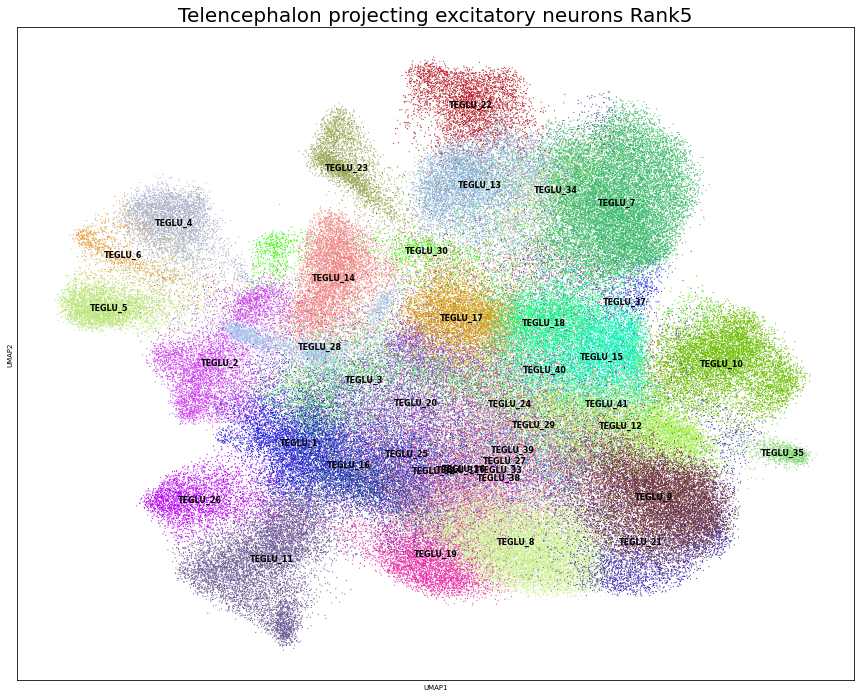

In [42]:
fig,ax = plt.subplots(figsize=(15,12))
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(7)
ax=sc.pl.umap(adata_sub,size=5, 
              legend_loc='on data',color='Rank5_Symbol',
              legend_fontsize=8,
              palette = cluster_pl,
              ax=ax,show=False)
ax.set_title(Plot_Rank4 + ' Rank5')
ax.title.set_fontsize(20)
# fig.savefig(Plot_Rank4 + 'UMAP_full.png',dpi = 300)

*Constellation* Plot

TEGLU_30 0.1352575488454707 TEGLU_13 0.043535509174954475


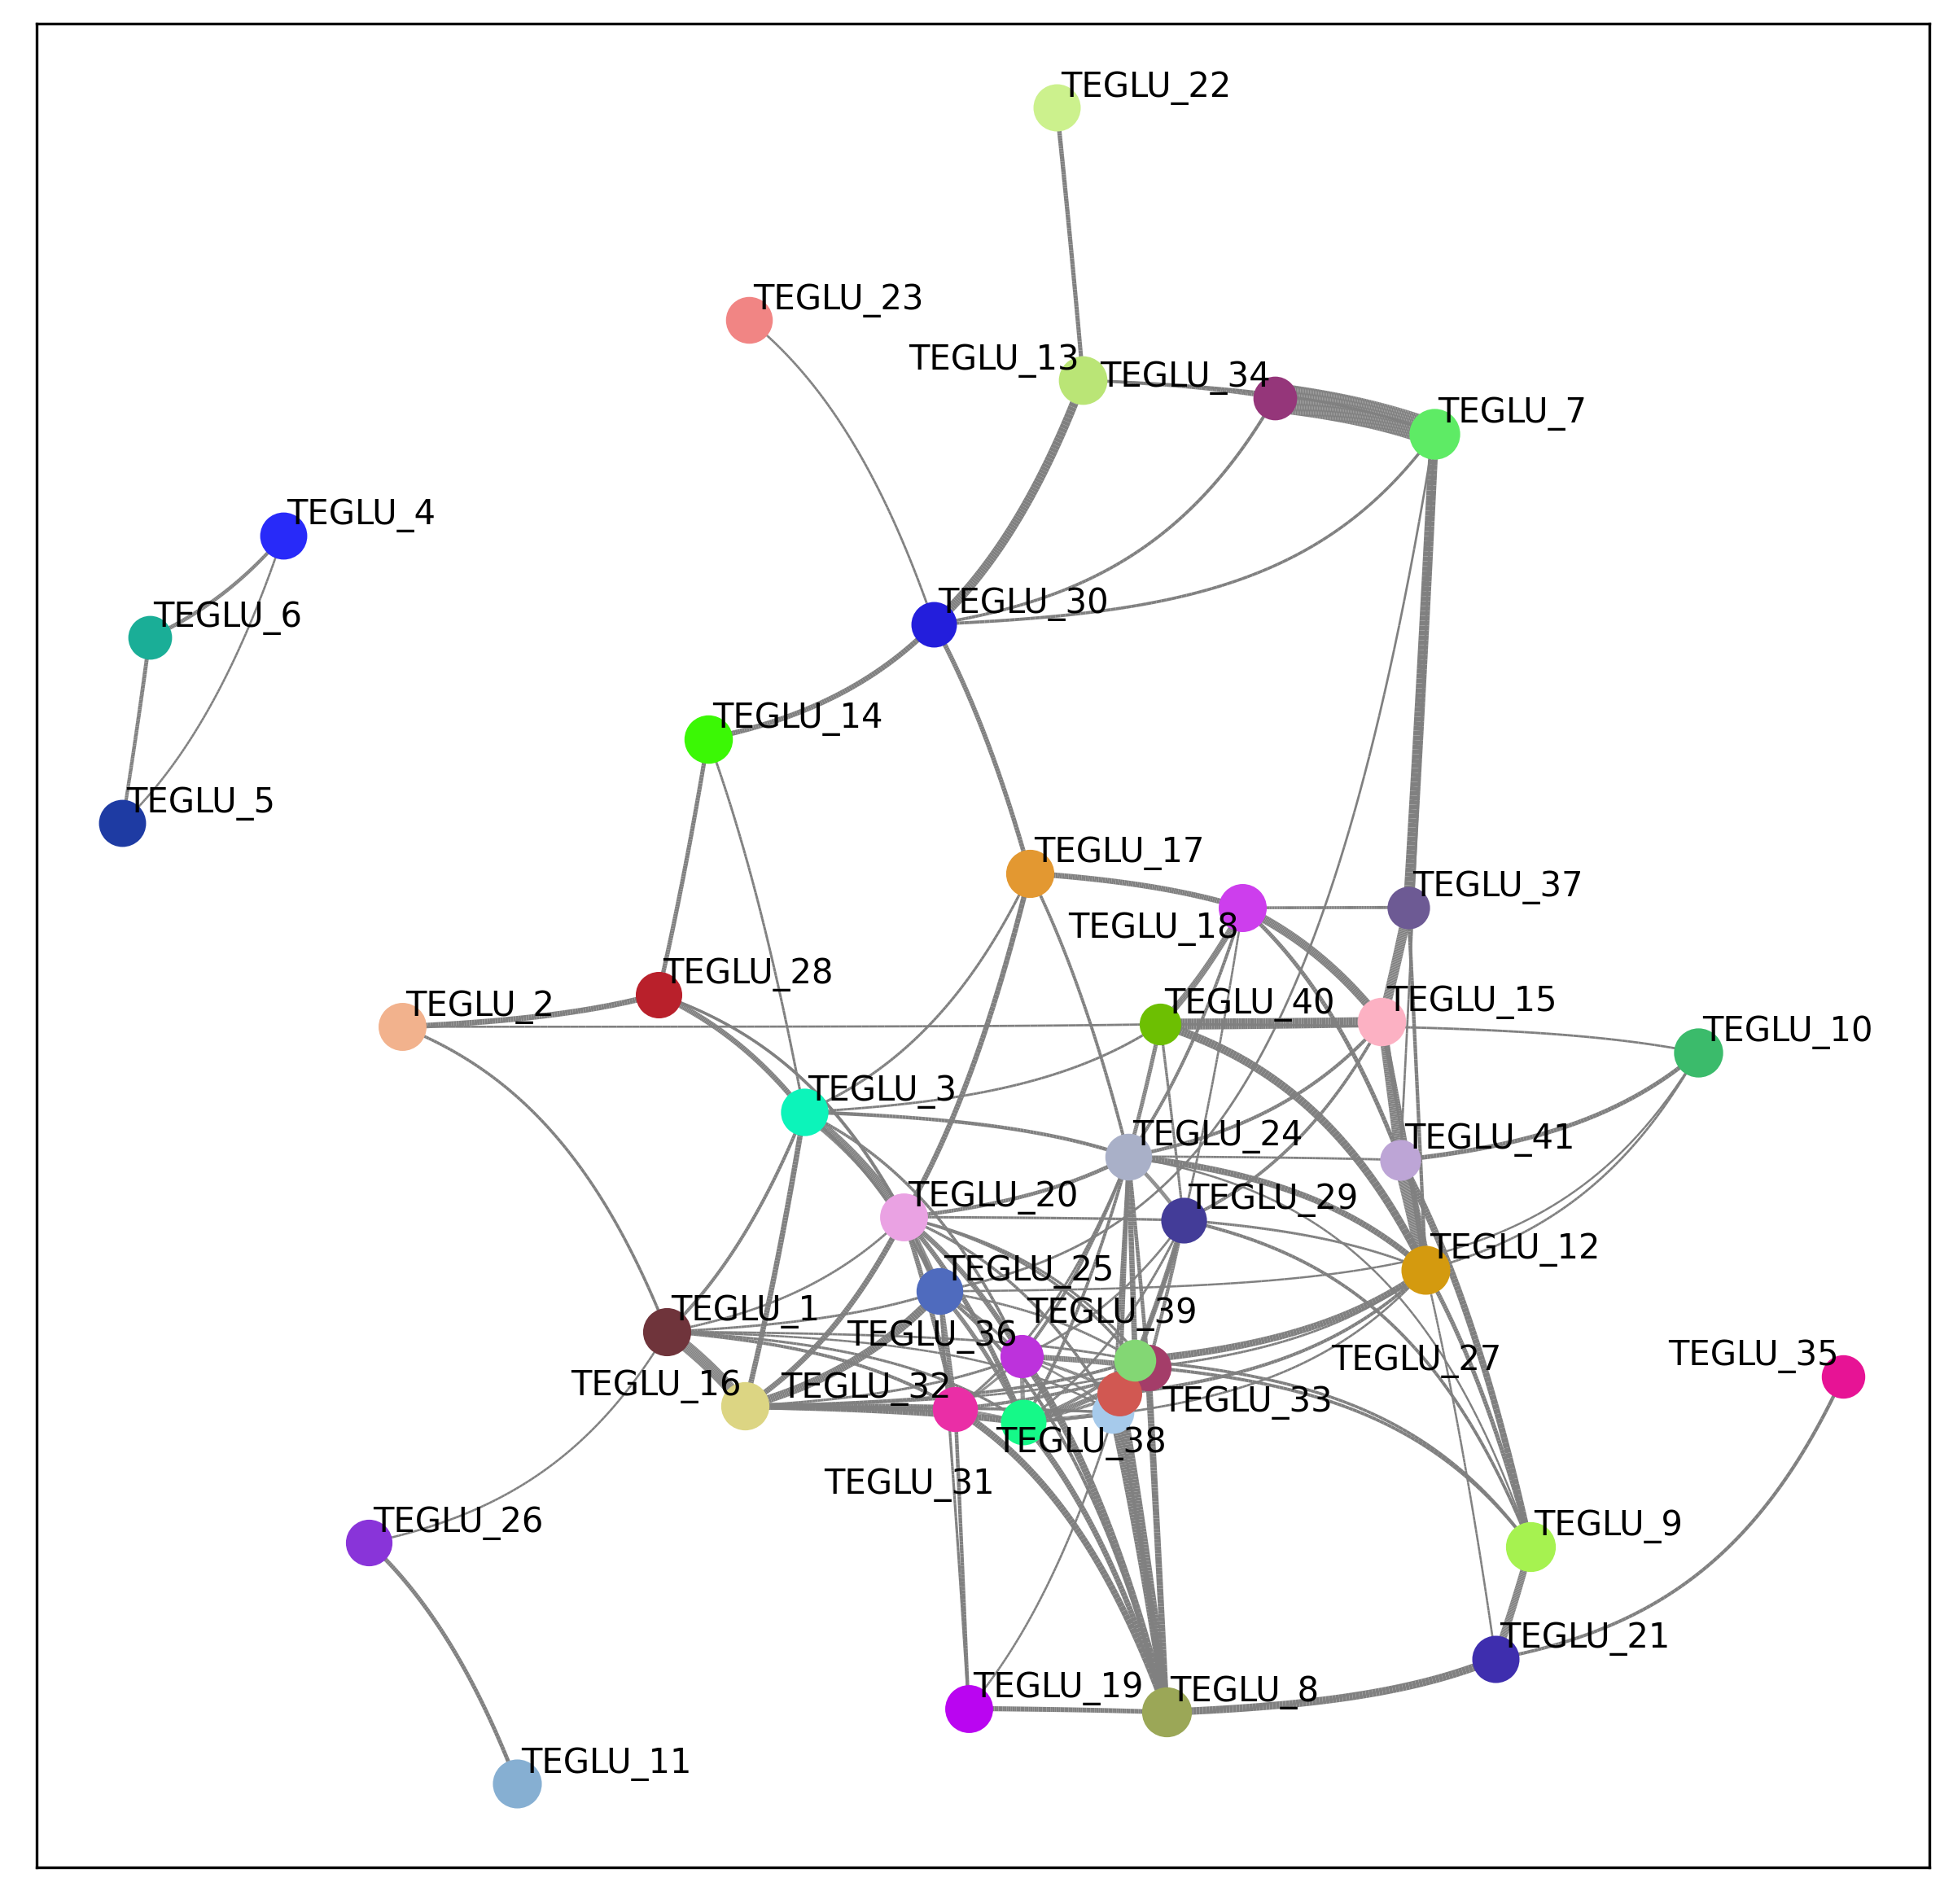

In [47]:
adata_sub.obs['leiden'] = adata_sub.obs['Rank5_Symbol'] 

X_umap_loc=adata_sub.obsm['X_umap']
leiden_umapcenter=pd.DataFrame(data={'leiden':[],'loc_1':[],'loc_2':[]})
leiden_width=pd.DataFrame(data={'leiden1':[],'leiden2':[],
                                'width_1':[]})

fig, ax = plt.subplots(figsize=(10,10),dpi=300)

#plot points and text
texts = []
for ind,i in enumerate(adata_sub.obs['leiden'].unique()):
    leiden_i_point=X_umap_loc[adata_sub.obs['leiden']==i,:]
    
    #find connection with 10-nn
    knn = NearestNeighbors(n_neighbors=10).fit(X_umap_loc)
    distances, indices = knn.kneighbors(leiden_i_point)
    pct_ofknn=pd.value_counts(adata_sub.obs['leiden'][np.ravel(indices)])/np.ravel(indices).shape[0]
    knn_0_03=pct_ofknn#[pct_ofknn>0.03]
    for indj,j in enumerate(knn_0_03.index):
#         print(indj,j,knn_0_03[indj])
        leiden_width=leiden_width.append({'leiden1':i,'leiden2':j,'width_1':knn_0_03[indj]},ignore_index=True)

    #find center
    i_loc=np.mean(leiden_i_point, axis=0)
    leiden_umapcenter=leiden_umapcenter.append({'leiden':i,'loc_1':i_loc[0],'loc_2':i_loc[1]},ignore_index=True)

flag=1
#plot connections
for ind,i in enumerate(adata_sub.obs['leiden'].unique()):
    i_knn=leiden_width.loc[leiden_width['leiden1']==i,:]
    i_knn=i_knn.loc[i_knn['width_1']>0.03,:]
    for indj,j in enumerate(i_knn['leiden2']):
        if i!=j:
            test=leiden_width.loc[((leiden_width['leiden1']==j) & (leiden_width['leiden2']==i))]
#             print(ind,i,i_knn.iloc[indj,:]['width_1'],indj,j,test['width_1'])
            
            point1=[leiden_umapcenter.loc[leiden_umapcenter['leiden']==i,:]['loc_1'].iloc[0],
                   leiden_umapcenter.loc[leiden_umapcenter['leiden']==i,:]['loc_2'].iloc[0]]

            point2=[leiden_umapcenter.loc[leiden_umapcenter['leiden']==j,:]['loc_1'].iloc[0],
                    leiden_umapcenter.loc[leiden_umapcenter['leiden']==j,:]['loc_2'].iloc[0]]            
            point1_width=i_knn.iloc[indj,:]['width_1']
            point2_width=test.iloc[0,:]['width_1']
            
            if flag==1:
                print(i,i_knn.iloc[indj,:]['width_1'],j,test.iloc[0,:]['width_1'])
                flag=0
            x,y = hanging_line(point1, point2)

            lwidths=[20*(point1_width+x*(point2_width-point1_width)/999) for x in (range(1000))]
            points = np.array([x, y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            lc = LineCollection(segments, linewidths=lwidths,color='gray')
            ax.add_collection(lc)
            leiden_width=leiden_width.drop(index=test.index[0])

            
for ind,i in enumerate(adata_sub.obs['leiden'].unique()):
    leiden_i_point=X_umap_loc[adata_sub.obs['leiden']==i,:]   
    i_loc=np.mean(leiden_i_point, axis=0)
    ax.scatter(i_loc[0],i_loc[1],color=cluster_pl[ind],s=math.log(leiden_i_point.shape[0])*20,edgecolor=None,zorder=2)
    texts.append(ax.text(i_loc[0],i_loc[1], i ))   
adjustText.adjust_text(texts)

ax.set_xticks([])
ax.set_yticks([])
fig.show()
# fig.savefig('ConstellationPlot_full.png')

# find gene markers


In [14]:
sc.tl.rank_genes_groups(adata_sub, 'Rank5_Symbol', method='t-test')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()

In [25]:
markers = []
markers_pval_row=[]
markers_row=[]

temp = pd.DataFrame(adata_sub.uns['rank_genes_groups']['names']).head(3)
temp_score = pd.DataFrame(adata_sub.uns['rank_genes_groups']['scores']).head(3)
temp_pvale = pd.DataFrame(adata_sub.uns['rank_genes_groups']['pvals']).head(3)

for i in range(temp.shape[1]):
    curr_col = temp.iloc[:, i].to_list()
    curr_col_score = temp_score.iloc[:, i].to_list()
    curr_col_pvale=temp_pvale.iloc[:, i].to_list()
    list_true=[x>0 for x in curr_col_score]
    curr_col=list(np.array(curr_col)[list_true])
    curr_col_pvale=list(np.array(curr_col_pvale)[list_true])
    
    markers = markers + curr_col
    markers_row.append(curr_col)
    markers_pval_row.append(curr_col_pvale)
    print(i, curr_col)

0 ['HPCAL1', 'LYPD1', 'DBPHT2']
1 ['DCN', 'CADM1', 'PRKCG']
2 ['KCNG1', 'C1QL3', 'HPCAL1']
3 ['CPNE6', 'NPTX1', 'NEUROD6']
4 ['PRKCG', 'CPNE6', 'NEUROD6']
5 ['NR3C2', 'ZBTB20', 'TMSB4X']
6 ['RPRM', 'NPTX1', 'HS3ST4']
7 ['LAMP5', 'CUX2', 'NRGN']
8 ['RORB', 'RGS4', 'GRM2']
9 ['TSHZ2', 'NREP', 'VAMP1']
10 ['LMO3', 'SLC30A3', 'RPRM']
11 ['GFRA2', 'NECAB1', 'WHRN']
12 ['NXPH3', 'HS3ST4', 'PRSS12']
13 ['TOX', 'PARM1', 'PRKCG']
14 ['SCUBE1', 'PDE1A', 'HS3ST2']
15 ['MATN2', 'LYPD1', 'ATP2B4']
16 ['C1QL3', 'RASL10A', 'PRSS12']
17 ['HS3ST2', 'RASL10A', 'SLC24A2']
18 ['NPTX2', 'CUX2', 'C1QL3']
19 ['BMP3', 'C1QL3', 'CCK']
20 ['KCNS1', 'RGS4', 'RORB']
21 ['TSHZ2', 'NXPH3', 'VWC2L']
22 ['NR4A2', 'RGS12', 'SYNPR']
23 ['PTGDS', 'PAPPA2', 'PLTP']
24 ['GRP', 'CUX2', 'C1QL3']
25 ['ABI3BP', 'NDST4', 'LMO3']
26 ['CCKBR', 'CUX2', 'C1QL3']
27 ['NECAB1', 'CBLN4', 'CBLN1']
28 ['CHRM1', 'TBR1', 'OLFM2']
29 ['RXFP1', 'TSHZ2', 'FN1']
30 ['NWD2', 'CUX2', 'C1QL3']
31 ['RGS14', 'CUX2', 'CALB1']
32 ['CHRM3', 'CUX2', 

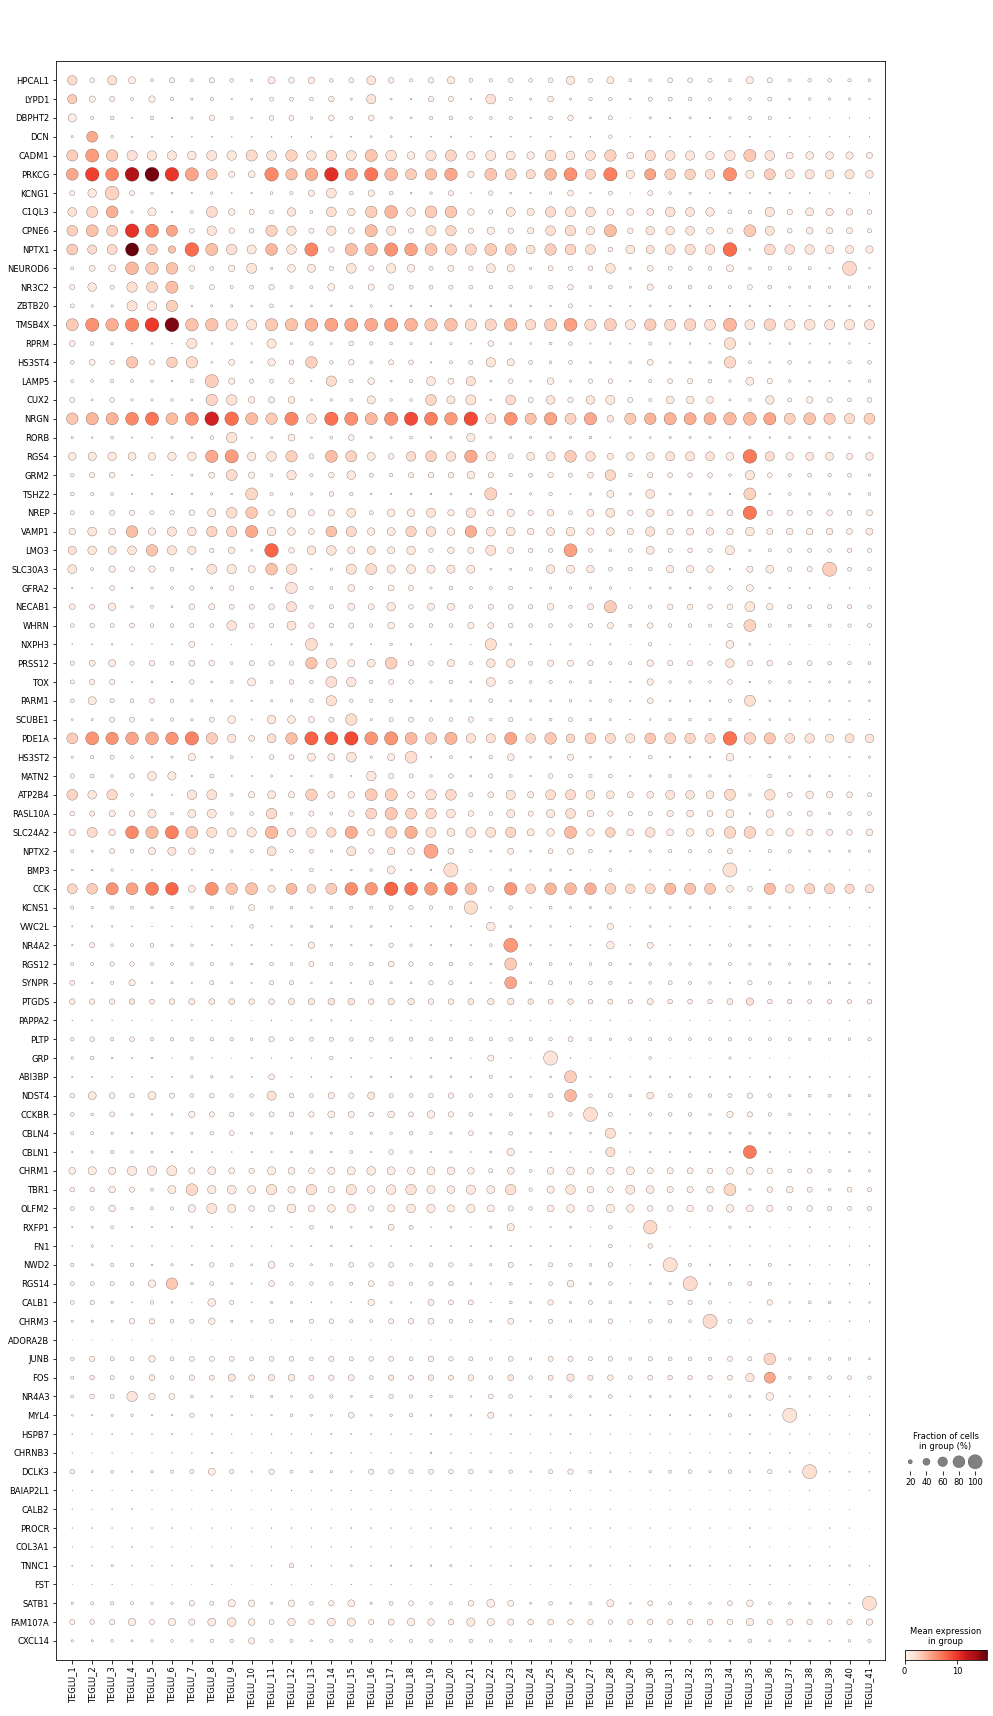

In [27]:
markers_apper=[]
for i in markers:
    if i not in markers_apper:
        markers_apper.append(i)        
        
        
axes=sc.pl.dotplot(adata_sub, markers_apper, 
                   groupby='Rank5_Symbol', swap_axes=True,return_fig=True)
axes.savefig('DotPlot_full.png',dpi = 300)